## 1D quantum mechanical

$$
-\frac{\hbar^2}{2m}\frac{d^2\psi}{dx^2} + V(x)\psi = E\psi
$$


### 1. First-order derivative

Let $f(x)$ be a function defined at discrete points $x_i$ with spacing $\Delta x = x_{i+1} - x_i$.

$$
f'(x_i) \approx \frac{f(x_{i+1}) - f(x_i)}{\Delta x}
$$

### 2. Second-order derivative

$$
f''(x_i) \approx \frac{f(x_{i+1}) - 2f(x_i) + f(x_{i-1})}{\Delta x^2}
$$


If we descretise the domain into $N+1$ sections by introducting $N$ points in between $[0,L]$, then the S.E. at each point must hold.
$$-\frac{\hbar^2}{2m}\frac{\psi(x_{i+1}) - 2\psi(x_i) + \psi(x_{i-1})}{\Delta x^2}+V\psi(x_i)=E\psi(x_i)$$



Rearranging the terms gives
$$-\frac{\hbar^2}{2m\Delta x^2}\psi(x_{i-1}) + \left(\frac{\hbar^2}{m\Delta x^2}+V\right)\psi(x_i) -\frac{\hbar^2}{2m\Delta x^2}\psi(x_{i+1}) = E\psi(x_i)$$


Define

$$
t\equiv\frac{\hbar^2}{2m\Delta x^2},\qquad \psi_i\equiv\psi(x_i),\qquad V_i\equiv V(x_i).
$$

Then the finite-difference equation

$$
-\,t\,\psi_{i-1} + (2t+V_i)\,\psi_i -\,t\,\psi_{i+1} = E\,\psi_i
$$

for $i=1,\dots,N$ can be written in matrix form as the eigenvalue problem

$$
H\boldsymbol{\psi}=E\boldsymbol{\psi},
\qquad
\boldsymbol{\psi}=(\psi_1,\psi_2,\dots,\psi_N)^T,
$$

with the tridiagonal Hamiltonian matrix

$$
H=
\begin{pmatrix}
2t+V_1 & -t      & 0       & \cdots & 0\\[6pt]
-t     & 2t+V_2  & -t      & \ddots & \vdots\\[6pt]
0      & -t      & \ddots  & \ddots & 0\\[6pt]
\vdots & \ddots  & \ddots  & 2t+V_{N-1} & -t\\[6pt]
0      & \cdots  & 0       & -t     & 2t+V_N
\end{pmatrix}.
$$

If $V$ is constant then $V_i=V$ and the diagonal entries are $2t+V$.
Common boundary conditions are $\psi_0=\psi_{N+1}=0$ (Dirichlet), which yields the above $N\times N$ matrix.


In [101]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal

MASS = 1*9.1093837e-31  # in kg
L = 10 # Length in angstrom
HBAR = 1.054571817e-34  # J.s
N = 2000 # Intermediate poitns between 0 and 1
DELTAX = L/(N+1) # N+2 points make N+1 equal sections
JOULE_TO_EV = 1/1.602176634e-19 # 1Joule = 1.602176634e-19 Joule :> 1 Joule = 1 kg.m^2.s^−2
t = JOULE_TO_EV*(HBAR*HBAR)/(2*MASS*DELTAX*DELTAX*1.0e-20) # Because V is in electron Volt so we have to convert this too in eV
print(f"Value of t: {t:.2f} eV")

Value of t: 152551.72 eV


In [102]:
def V(x):
    y = x/L
    # Define it in electronVolt
    return 10*(np.abs(y-0.7)<0.082)

x = np.linspace(0,L,num=N+2)
V_x = V(x)

In [103]:
diagValues = V_x[1:-1]+2*t
firstUpperDiagValues = -t*np.ones(N-1)
# H = np.zeros(shape=(N,N))
# np.fill_diagonal(H, diagValues) # fill main diag
# np.fill_diagonal(H[:-1, 1:], -t) # fill first upper diag
# np.fill_diagonal(H[1:, :-1], -t) # fill first lower diag
# eigenvalues, eigenvectors = np.linalg.eig(H)  # This return eigenvectors as different columns
eigenvalues, eigenvectors = eigh_tridiagonal(diagValues, firstUpperDiagValues) # This is much much faster
sortIdx = np.argsort(eigenvalues) 
eigenvalues = eigenvalues[sortIdx]
eigenvectors = eigenvectors[:,sortIdx] # sort coulumns
eigenvectors /= np.sqrt(np.sum(np.square(eigenvectors)*DELTAX,axis=0)) # sum each column



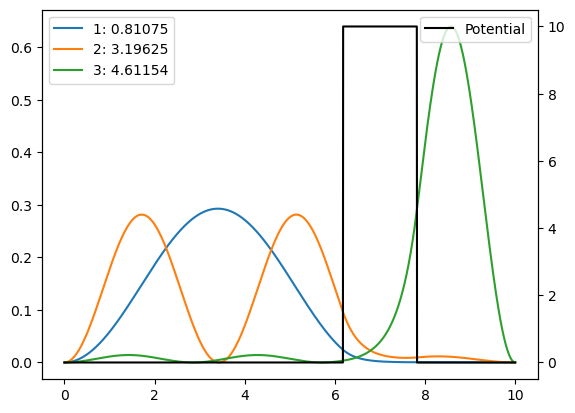

In [104]:
numStates=3
fig,ax = plt.subplots(1,1)
axTwin=ax.twinx()

ax.plot(x[1:-1],eigenvectors[:,:numStates]**2,"-",label=[f"{i+1}: {val:>0.5f}" for i,val in enumerate(eigenvalues[:numStates])])
axTwin.plot(x,V_x,"k-",label="Potential")
axTwin.legend()
ax.legend()
